#Importando biblioteca e dataset

In [ ]:
import pandas as pd

perfumes_df = pd.read_csv("/content/final_perfume_data.csv",encoding="latin1")

In [ ]:
perfumes_df.head()

,Name,Brand,Description,Notes,Image URL
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...","Vanilla bean, musks",https://static.luckyscent.com/images/products/...
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,"Lavender, Yuzu, Lemongrass, Magnolia, Geraniu...",https://static.luckyscent.com/images/products/...
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,"Green yuzu, green shikuwasa, sansho seed, cor...",https://static.luckyscent.com/images/products/...
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,"tangerine, pink pepper, black coffee, leat...",https://static.luckyscent.com/images/products/...
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"Bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...


##Análise Exploratória

In [ ]:
perfumes_df.shape

(2191, 5)

In [ ]:
perfumes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         2191 non-null   object
 1   Brand        2191 non-null   object
 2   Description  2191 non-null   object
 3   Notes        2111 non-null   object
 4   Image URL    2191 non-null   object
dtypes: object(5)
memory usage: 85.7+ KB


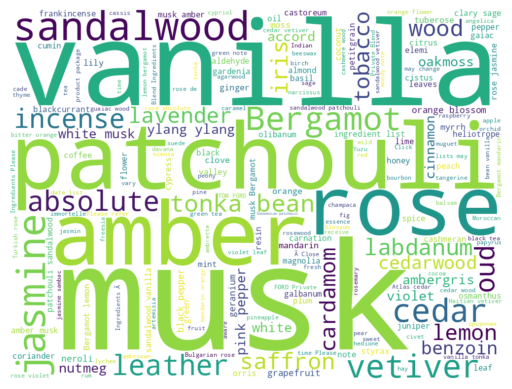

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

notas = " ".join(str(nota) for nota in perfumes_df['Notes'].values if isinstance(nota, str))

wc = WordCloud(background_color='white', stopwords=STOPWORDS, height=750, width=1000)
word_cloud = wc.generate(notas)

# Exibir a nuvem de palavras
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Definindo pré-processamento do texto

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


nltk.download('stopwords')
nltk.download('punkt')

# Função para pré-processamento das notas olfativas
def preprocessamento_notas_df(df, coluna_notas):
    # Função para pré-processamento de uma nota olfativa individual
    def preprocessamento_notas(notas):
        if isinstance(notas, str):
            # Tokenização das notas olfativas
            tokens = word_tokenize(notas.lower())

            # Remoção de stopwords e pontuações
            stop_words = set(stopwords.words('english'))
            tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]

            # Juntar tokens de volta em uma string
            notas_processadas = ' '.join(tokens)
        else:
            notas_processadas = ''

        return notas_processadas


    df['notas_processadas'] = df[coluna_notas].apply(preprocessamento_notas)

    return df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
perfumes_df = preprocessamento_notas_df(perfumes_df, 'Notes')

In [ ]:
perfumes_df.head()

,Name,Brand,Description,Notes,Image URL,notas_processadas
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...","Vanilla bean, musks",https://static.luckyscent.com/images/products/...,vanilla bean musks
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,"Lavender, Yuzu, Lemongrass, Magnolia, Geraniu...",https://static.luckyscent.com/images/products/...,lavender yuzu lemongrass magnolia geranium jas...
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,"Green yuzu, green shikuwasa, sansho seed, cor...",https://static.luckyscent.com/images/products/...,green yuzu green shikuwasa sansho seed coriand...
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,"tangerine, pink pepper, black coffee, leat...",https://static.luckyscent.com/images/products/...,tangerine pink pepper black coffee leather vio...
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"Bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...,bergamot almond violet jasmine leather sandalw...


##Calculando matriz de similaridade jaccard

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

def calculate_jaccard_similarity_matrix(notes):
    # Preencher valores ausentes com uma string vazia
    notes = notes.fillna('')

    # Convertendo notas para representações binárias usando CountVectorizer
    count_vectorizer = CountVectorizer(binary=True)
    count_matrix = count_vectorizer.fit_transform(notes)

    # Converter a matriz esparsa em uma matriz densa
    count_matrix_dense = count_matrix.toarray()

    # Calcular a distância de Jaccard entre as notas
    jaccard_sim_matrix = 1 - pairwise_distances(count_matrix_dense, metric='jaccard')

    return jaccard_sim_matrix

# Exemplo de uso
jaccard_sim_matrix1 = calculate_jaccard_similarity_matrix(perfumes_df['Notes'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [ ]:
print(jaccard_sim_matrix1)

[[1.         0.         0.         ... 0.08333333 0.03448276 0.05      ]
 [0.         1.         0.04761905 ... 0.05882353 0.         0.        ]
 [0.         0.04761905 1.         ... 0.         0.         0.        ]
 ...
 [0.08333333 0.05882353 0.         ... 1.         0.02777778 0.03703704]
 [0.03448276 0.         0.         ... 0.02777778 1.         0.02272727]
 [0.05       0.         0.         ... 0.03703704 0.02272727 1.        ]]


##Função para recomendação do perfume

In [ ]:
def recomendacao_similar_perfumes(nome_referencia, matriz_similaridade, nome_perfume, top_n=5):
    # Verificar se o nome do perfume de referência está presente na lista de nomes de perfume
    if nome_referencia not in nome_perfume:
        print(f'O perfume {nome_referencia} não está na lista de nomes de perfume.')
        return []

    # Encontrar o índice do perfume de referência
    indice_refe = nome_perfume.index(nome_referencia)

    # Obter a linha de similaridades para o perfume de referência
    similaridades = matriz_similaridade[indice_refe]

    # Excluir a similaridade do perfume de referência
    similaridades[indice_refe] = -1

    # Obter os índices dos perfumes mais semelhantes
    indices_perfumes_similares = np.argsort(similaridades)[::-1][:top_n]

    # Selecionar os nomes dos perfumes mais semelhantes
    perfumes_similares = [nome_perfume[i] for i in indices_perfumes_similares]

    return perfumes_similares

# Exemplo de uso
perfume_escolhido = 'Tobacco Vanille Eau de Parfum'  ## nome do perfume para teste
top_n_perfumes = recomendacao_similar_perfumes(perfume_escolhido, jaccard_sim_matrix1, perfumes_df['Name'].tolist(), top_n=5)

# Exibir os nomes dos perfumes recomendados
for perfume in top_n_perfumes:
    print(perfume)

Tobacco Vanille Travel Atomizer
Lavender Extreme Eau de Parfum
Tobacco Oud Intense Eau de Parfum
Oud Wood Intense Eau de Parfum
Tuscan Leather Eau de Parfum


In [ ]:
# Exemplo de uso
perfume_escolhido = 'Soleil Neige Eau de Parfum'  ## nome do perfume para teste
top_n_perfumes = recomendacao_similar_perfumes(perfume_escolhido, jaccard_sim_matrix1, perfumes_df['Name'].tolist(), top_n=5)

# Exibir os perfumes recomendados
for perfume in top_n_perfumes:
    print(perfume)

Soleil Blanc Eau de Parfum
Noir de Noir Eau de Parfum
Lavender Extreme Eau de Parfum
Fleur de Portofino Eau de Parfum
Tuscan Leather Eau de Parfum
